### Importing API and libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow import keras
import seaborn as sns
from collections import Counter
print("Keras in standby...")

Keras in standby...


### Reading data:

Counter yTrain_> Counter({0: 23, 1: 22, 6: 9, 4: 5, 2: 4, 5: 1})
Countery Test_> Counter({1: 54, 0: 47, 6: 20, 2: 13, 4: 8, 5: 8})


[]

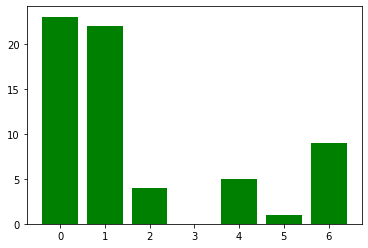

In [44]:
glassDatabase = pd.read_csv("Databases/Glass/glass.data",delim_whitespace=False, header=None, index_col= 0)
attrNames = ["RI",
            "NA2O",
            "MGO",
            "AL2O3",
            "SIO2",
            "K2O",
            "CAO",
            "BAO",
            "FE2O3",
            "Class",
            ]

glassDatabase.columns = attrNames
# print((glassDatabase))
# labels = glassDatabase.iloc[:,-1]
labels = glassDatabase["Class"]
# labels_NORMAL = labels.min()/(labels.max() - labels.min())
glassDatabase_Attributes = glassDatabase.iloc[:,0:-1]
y2= keras.utils.to_categorical(labels)
y2 = pd.DataFrame(data = y2)
y2 = y2.iloc[:,1:]
# xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, labels, test_size=0.7, train_size=0.3, shuffle=True)

xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, y2, test_size=0.7, train_size=0.3, shuffle=True)

print("Counter yTrain_>",Counter(np.argmax(yTrain.values, axis=-1)))
countYTrain = Counter(np.argmax(yTrain.values, axis=-1))
print("Countery Test_>",Counter(np.argmax(yTest.values, axis=-1)))
countYTest = Counter(np.argmax(yTest.values, axis=-1))
# previewFrameYTrain = pd.DataFrame.from_dict(Counter(np.argmax(yTrain.values, axis=-1)), orient='index')
# previewFrameYTest = pd.DataFrame.from_dict(Counter(np.argmax(yTest.values, axis=-1)), orient='index')
# sns.countplot(x =previewFrameYTrain[0] , data = previewFrameYTrain, order=previewFrameYTrain[0].value_counts().index)
plt.bar(countYTrain.keys(),countYTrain.values(), color='g')
plt.plot()

# sns.barplot(x=, y=, data=previewFrameYTrain)
# sns.barplot(x="Class", y="Class", data=previewFrameYTest)

[]

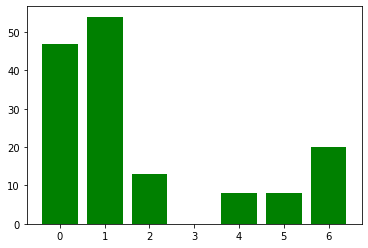

In [45]:
plt.bar(countYTest.keys(),countYTest.values(), color='g')
plt.plot()

### Normalization

In [3]:
# for i in range(0, glassDatabase.shape[1]-1):
    # glassDatabase.iloc[:,i] = (glassDatabase.iloc[:,i] - glassDatabase.iloc[:,i].min())/ (glassDatabase.iloc[:,i].max() - glassDatabase.iloc[:,i].min())

scaler= preprocessing.StandardScaler().fit(xTrain)
xTrain_std = scaler.transform(xTrain)
xTest_std = scaler.transform(xTest)

### Creating a model

In [4]:
model = keras.Sequential()
# model.add(keras.layers.Dense(10, activation="sigmoid", input_dim = glassDatabase.shape[1]-1))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(5, activation="relu"))
model.add(keras.layers.Dense(3, activation="relu"))
# model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))
# model.add(keras.layers.Dense(1, activation="softmax"))
# model.add(keras.layers.Dense(1, activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
es = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
np.random.seed(1)


### Training the network

In [5]:
# history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
# print(glassDatabase.iloc[:,:-1])
outputs = model.predict(xTest_std)
outputs = pd.DataFrame(data = outputs)
outputs.rename(columns={0:"Class1", 1:"Class2", 2:"Class3", 3:"Class4", 4:"Class5", 5:"Class6", 6:"Class7"} , inplace=True)
outputsFinalPred = pd.DataFrame(np.where(outputs.T == outputs.T.max(), 1, 0),index=outputs.columns).T

yTest.rename(columns={1:"Class1", 2:"Class2", 3:"Class3", 4:"Class4", 5:"Class5", 6:"Class6", 7:"Class7"} , inplace=True)
model.summary()


Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 2.0035 - accuracy: 0.0392 - val_loss: 2.0833 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9879 - accuracy: 0.1765 - val_loss: 2.0655 - val_accuracy: 0.1538
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9766 - accuracy: 0.2549 - val_loss: 2.0495 - val_accuracy: 0.1538
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9661 - accuracy: 0.3137 - val_loss: 2.0352 - val_accuracy: 0.2308
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9575 - accuracy: 0.3725 - val_loss: 2.0196 - val_accuracy: 0.2308
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9491 - accuracy: 0.3922 - val_loss: 2.0091 - val_accuracy: 0.2308
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 1.9411 - accuracy: 0.3922 - val_loss: 1.9987 - val_accuracy: 0.2308
Epoch 8/100
6/6 [=====

In [6]:
classes_pred = model.predict(xTest_std)

print("Classes_prediction_>\n",classes_pred[50:100,:])

print("Classes test results_>\n",yTest[50:100])

Classes_prediction_>
 [[0.16117957 0.15731715 0.14405607 0.12713139 0.1370908  0.1340147
  0.13921034]
 [0.1627875  0.15570952 0.14566353 0.12844606 0.13648598 0.13364029
  0.13726704]
 [0.16117957 0.15731715 0.14405607 0.12713139 0.1370908  0.1340147
  0.13921034]
 [0.16425858 0.15411761 0.14722955 0.12979943 0.13635564 0.13264641
  0.13559273]
 [0.1624927  0.15587984 0.14546013 0.12835374 0.13703416 0.13306388
  0.13771556]
 [0.16270894 0.15633066 0.14517245 0.12771137 0.13455103 0.13660376
  0.13692187]
 [0.16487885 0.15348832 0.14786032 0.13032085 0.13615276 0.13243972
  0.13485923]
 [0.1653513  0.15361743 0.1478713  0.12995608 0.13382186 0.13554658
  0.13383545]
 [0.20302431 0.11851273 0.18444464 0.15740854 0.10992126 0.13494745
  0.09174113]
 [0.16459927 0.15378357 0.14756721 0.13007168 0.13620384 0.13259326
  0.13518119]
 [0.19721013 0.12386607 0.17873509 0.15325719 0.11382576 0.13539222
  0.09771358]
 [0.16221185 0.15610668 0.14521827 0.12818755 0.1373281  0.1328531
  0.1380944

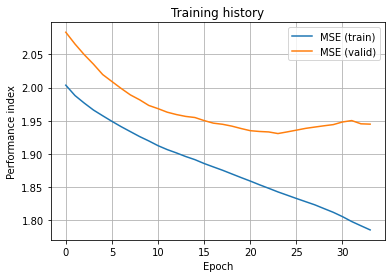

yTest.values>
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
yTest>
      Class1  Class2  Class3  Class4  Class5  Class6  Class7
208     0.0     0.0     0.0     0.0     0.0     0.0     1.0
128     0.0     1.0     0.0     0.0     0.0     0.0     0.0
67      1.0     0.0     0.0     0.0     0.0     0.0     0.0
74      0.0     1.0     0.0     0.0     0.0     0.0     0.0
85      0.0     1.0     0.0     0.0     0.0     0.0     0.0
..      ...     ...     ...     ...     ...     ...     ...
97      0.0     1.0     0.0     0.0     0.0     0.0     0.0
5       1.0     0.0     0.0     0.0     0.0     0.0     0.0
83      0.0     1.0     0.0     0.0     0.0     0.0     0.0
149     0.0     0.0     1.0     0.0     0.0     0.0     0.0
49      1.0     0.0     0.0     0.0     0.0     0.0     0.0

[150 rows x 7 columns]
outputsFinalPred.values>
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0

<AxesSubplot:>

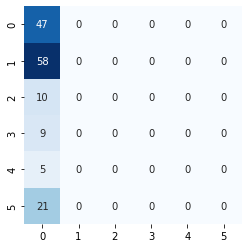

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('Performance index')
plt.xlabel('Epoch')
plt.legend(['MSE (train)', 'MSE (valid)'], loc='upper right')
plt.grid()
plt.show()

# Plot target-output relationship (ideal: targets == outputs, straight line)
# plt.plot(y2,outputs,'ok')
# plt.title('Output scatter plot')
# plt.xlabel('targets')
# plt.ylabel('outputs')
# plt.grid()
# plt.show()

# print(glassDatabase)
# matrix_confusion = confusion_matrix(yTest, outputsFinalPred)
print("yTest.values>\n",yTest.values)
print("yTest>\n",yTest)
print("outputsFinalPred.values>\n",outputsFinalPred.values)
matrix_confusion = confusion_matrix(
    yTest.values.argmax(axis=1), outputsFinalPred.values.argmax(axis=1))
print("Confusion matrix_>\n",matrix_confusion)
print("Correct predictions are 0_>\n")
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
# df_confusion = pd.crosstab(yTest, outputsFinalPred, rownames=['Actual'], colnames=['Predicted'], margins=True)
